In [207]:
print('Hello')

Hello


In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import joblib

In [209]:
dataset = 'navjotkaushal/coffee-sales-dataset'
kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset,unzip=True)

Dataset URL: https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset


In [210]:
df = pd.read_csv('Coffe_sales.csv')
df.head(3)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [212]:
df.isna().sum().sum()

np.int64(0)

In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
Weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0
Monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0


In [215]:
df.select_dtypes(exclude='number')

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time
0,card,Latte,Morning,Fri,Mar,2024-03-01,10:15:50.520000
1,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,12:19:22.539000
2,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,12:20:18.089000
3,card,Americano,Afternoon,Fri,Mar,2024-03-01,13:46:33.006000
4,card,Latte,Afternoon,Fri,Mar,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...
3542,card,Cappuccino,Morning,Sun,Mar,2025-03-23,10:34:54.894000
3543,card,Cocoa,Afternoon,Sun,Mar,2025-03-23,14:43:37.362000
3544,card,Cocoa,Afternoon,Sun,Mar,2025-03-23,14:44:16.864000
3545,card,Americano,Afternoon,Sun,Mar,2025-03-23,15:47:28.723000


In [216]:
df['cash_type'].unique()
# We can drop this 
df=df.drop(columns=['cash_type'])
df.head(3)

,hour_of_day,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [217]:
# We dont need weekdatsort as well as monthsort or we can remove weekday and month_name to train our model
df= df.drop(columns=['Weekday','Month_name','Date','Time'])
df.head(3)

,hour_of_day,money,coffee_name,Time_of_Day,Weekdaysort,Monthsort
0,10,38.7,Latte,Morning,5,3
1,12,38.7,Hot Chocolate,Afternoon,5,3
2,12,38.7,Hot Chocolate,Afternoon,5,3


In [218]:
df.dtypes

hour_of_day      int64
money          float64
coffee_name     object
Time_of_Day     object
Weekdaysort      int64
Monthsort        int64
dtype: object

In [219]:
le=LabelEncoder()

df_encoded = df.copy()

for col in df_encoded.select_dtypes(exclude=['number']).columns:
    df_encoded[col]=   le.fit_transform(df_encoded[col])
    

In [220]:
df_encoded

,hour_of_day,money,coffee_name,Time_of_Day,Weekdaysort,Monthsort
0,10,38.70,7,1,5,3
1,12,38.70,6,0,5,3
2,12,38.70,6,0,5,3
3,13,28.90,0,0,5,3
4,13,38.70,7,0,5,3
...,...,...,...,...,...,...
3542,10,35.76,2,1,7,3
3543,14,35.76,3,0,7,3
3544,14,35.76,3,0,7,3
3545,15,25.96,0,0,7,3


In [221]:
# Model 
x = df_encoded.drop(columns=['money'])
y = df_encoded['money']

In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9,random_state=7)

In [223]:

ss = StandardScaler()
x_train_scaled  = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)


In [224]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [225]:
y_pred_train = linear_model.predict(x_train_scaled)
y_pred_test = linear_model.predict(x_test_scaled)

In [226]:
mean_squared_error(y_train,y_pred_train)
r2_score(y_train,y_pred_train)

0.23383608147025337

In [227]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

linear_y_pred_train = linear_model.predict(x_train_scaled)
linear_y_pred_test = linear_model.predict(x_test_scaled)

#Train  MSE and R2
linear_train_mse = mean_squared_error(y_train, linear_y_pred_train)
linear_train_r2 = r2_score(y_train, linear_y_pred_train)

print("Train MSE:",linear_train_mse)
print("Train R2:" ,linear_train_r2)

#Test MSE and R2
linear_test_mse = mean_squared_error(y_test, linear_y_pred_test)
linear_test_r2 = r2_score(y_test, linear_y_pred_test)

print("Test MSE:",linear_test_mse)
print("Test R2:" ,linear_test_r2)

Train MSE: 18.170443369949087
Train R2: 0.23383608147025337
Test MSE: 19.281410981044097
Test R2: 0.20879934917970822


In [228]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Loop through each model
for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))

    # Fit model
    model.fit(x_train_scaled, y_train)

    # Predict
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    # Evaluate on train
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # Evaluate on test
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Print results
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train R²:  {train_r2:.4f}")
    print(f"Test MSE:  {test_mse:.4f}")
    print(f"Test R²:   {test_r2:.4f}")



Linear Regression
-----------------
Train MSE: 18.1704
Train R²:  0.2338
Test MSE:  19.2814
Test R²:   0.2088

Ridge Regression
----------------
Train MSE: 18.1704
Train R²:  0.2338
Test MSE:  19.2812
Test R²:   0.2088

Lasso Regression
----------------
Train MSE: 18.2038
Train R²:  0.2324
Test MSE:  19.2694
Test R²:   0.2093

ElasticNet Regression
---------------------
Train MSE: 18.2079
Train R²:  0.2323
Test MSE:  19.2855
Test R²:   0.2086


In [229]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [230]:
# Predict on train and test
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Train scores
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test scores
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Display
print("Random Forest Performance")
print("--------------------------")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R²:  {train_r2:.4f}")
print(f"Test MSE:  {test_mse:.4f}")
print(f"Test R²:   {test_r2:.4f}")


Random Forest Performance
--------------------------
Train MSE: 0.1503
Train R²:  0.9937
Test MSE:  0.5659
Test R²:   0.9768


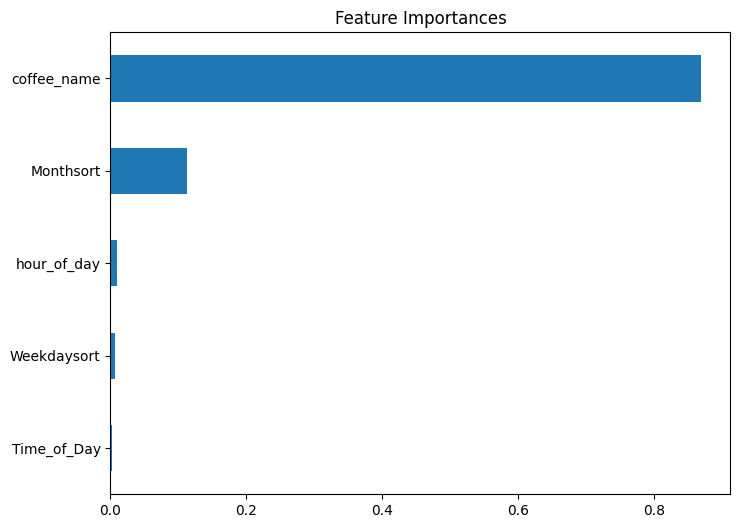

In [231]:
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), title='Feature Importances')
plt.show()


In [232]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best R² score on training folds:", grid.best_score_)


Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score on training folds: 0.9779337695266938


In [233]:
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=7
)

best_rf.fit(x_train, y_train)
y_pred_test = best_rf.predict(x_test)




y_pred_train = best_rf.predict(x_train)
y_pred_test = best_rf.predict(x_test)

# Train scores
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test scores
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Display
print("Random Forest Performance")
print("--------------------------")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R²:  {train_r2:.4f}")
print(f"Test MSE:  {test_mse:.4f}")
print(f"Test R²:   {test_r2:.4f}")


Random Forest Performance
--------------------------
Train MSE: 0.2782
Train R²:  0.9883
Test MSE:  0.5079
Test R²:   0.9792


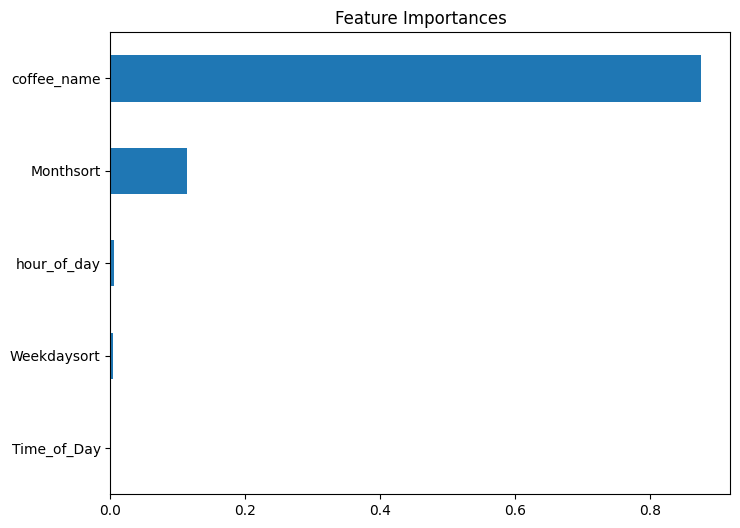

In [234]:


importances = pd.Series(best_rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), title='Feature Importances')
plt.show()
